<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\Aakriti\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Aakriti\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Aakriti\.julia\environments\v1.8\Manifest.toml`


In [2]:
import SpecialFunctions
import Plots

In [3]:
using SpecialFunctions, Plots, Random 
function sample_gaussian(𝜇,𝜎,n)
    data = []
    for i=1:n
        random_samples = rand()
        gaussian_samples = @. 𝜇 + (𝜎 * sqrt(2) * erfinv((2 * random_samples) - 1))
        push!(data, gaussian_samples)
    end
    return data
end
     

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [4]:
Data = sample_gaussian(-1,2,10000)

10000-element Vector{Any}:
  0.32607453603187997
  1.1448800221720519
 -2.2343534622456565
  1.2523322866972664
 -3.1327034766610153
 -2.2738416068143366
  0.04010321572899622
 -0.5643100062258826
 -0.42173019064899964
 -0.7086004721260366
 -2.235359270608284
 -4.818190686108544
 -1.6681341932263
  ⋮
 -1.7678766417010414
 -1.9576016932076834
 -2.7706408993495493
 -1.9971641387769645
 -1.4422086994035683
  1.550744037702763
  2.776974734752208
 -1.1306045959598354
  2.853091067066272
 -0.5788355603998927
  0.6674474527976231
  0.24468578688568643

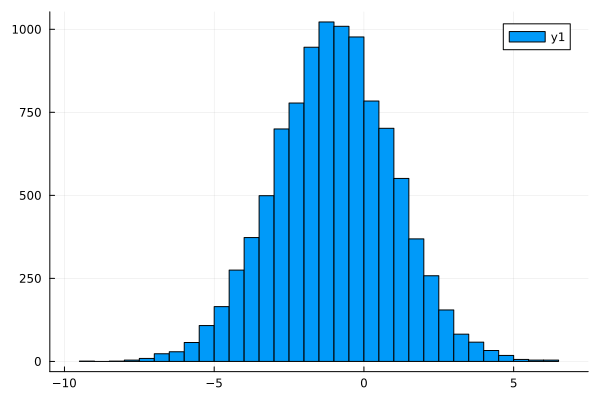

In [5]:
histogram(Data)

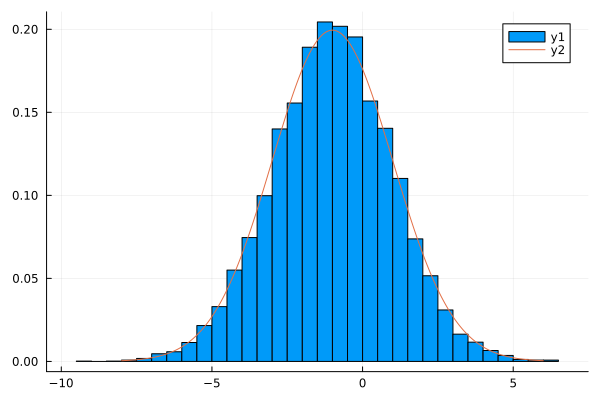

In [6]:
using Distributions
x = -8:0.001:6
Gaussian = pdf.(Normal(-1,2),x)
histogram(Data, normalize=true)
plot!(x,Gaussian)